📖 Brief Introduction

This project aims to predict a student's exam score based on the number of hours they study.
Since study hours directly impact scores, Linear Regression is the best choice to model this relationship.
### Why Linear Regression?
- The relationship is expected to be linear (more study hours = better scores).
- The model finds a best-fit line that predicts scores based on study time.
- Ideal for EdTech applications, helping students plan study schedules efficiently.

#### Dataset Overview:
- 97 rows of student records.
- Feature: Study Hours (X).
- Target Variable: Exam Scores (y).


Step 1: Loading & Exploring the Dataset
We first need to: 
- ✅ Read the dataset into a Pandas DataFrame.
- ✅ Check the structure to ensure it’s correctly loaded.
1.1 Load the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_data = pd.read_csv('Data/score_updated.csv')
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


1.2. Check Dataset Info

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [4]:
student_data.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [5]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Step 2: Visualizing the Data
- A scatter plot will help us see if the exam score increases proportionally as study hours increase.

2.1. Create a Scatter Plot


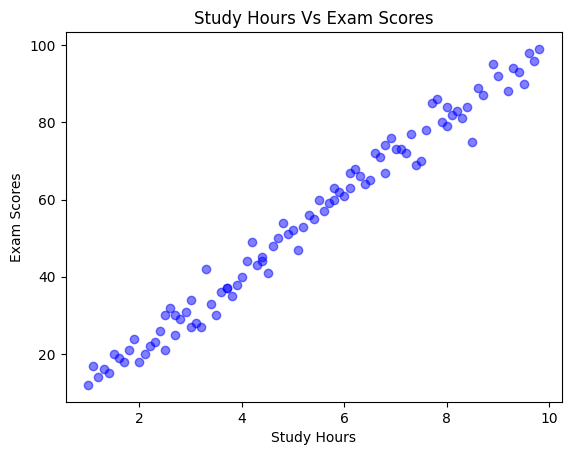

In [6]:
# Scatter plot of study hours vs scores
plt.scatter(student_data['Hours'], student_data['Scores'], color = 'blue', alpha=0.5)
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.title("Study Hours Vs Exam Scores")
plt.show()

Takeaway:

📌 Summary of Our Understanding:
- As study hours increase, exam scores tend to increase.
- The data follows a nearly straight-line pattern, confirming linearity.
- This means Linear Regression is a suitable choice for modeling this relationship. 


Step 3: Checking Correlation Using a 

A heatmap visually represents correlation strength between features.
Since we have only two variables, the correlation matrix will be small—but still informative!
3.1. Generate a Correlation Heatmap


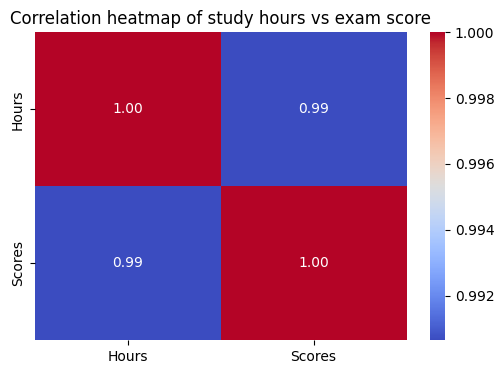

In [7]:
# Compute correlation matrix
corr_matrix = student_data.corr()

# ploting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title("Correlation heatmap of study hours vs exam score")
plt.show()

Step 4: Preparing Data for Model Training
Before training the model, we need to:
- ✅ Separate features (X) and target variable (y)
- ✅ Split data into training and testing sets

4.1. Define Features & Target

Since we are predicting exam scores based on study hours, we set:
- Independent variable (X) = Study Hours
- Dependent variable (y) = Exam Scores


In [15]:
X = student_data[['Hours']] # Features (Independent Variable)
y = student_data['Scores'] # Target (Dependent Variable)

In [16]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
...,...
91,5.8
92,4.4
93,6.1
94,3.7


4.2. Split Data into Training & Testing Sets
- We divide data so the model learns from one part and predicts on unseen data.


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
print("Training Data Shape:", X.shape)
print("Testing Data Shape:", y.shape)


Training Data Shape: (96, 1)
Testing Data Shape: (96,)


In [19]:
# Splitting into 80% training and 20% testing
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (76, 1)
Testing Data Shape: (20, 1)


Step 5: Training the Linear Regression Model

-  use Scikit-Learn’s Linear Regression to fit the model.

5.1. Import & Initialize Linear Regression


In [20]:
from sklearn.linear_model import LinearRegression
# Initialize model
linear_model = LinearRegression()

5.2 Train the Model

In [21]:
# Fit the model using training data
linear_model.fit(X_train, y_train)

LinearRegression()

Step 6: Evaluating Model Performance

We'll check: 
- ✅ Mean Absolute Error (MAE) → Measures the average difference between actual vs predicted scores.
- ✅ Scatter Plot of Predictions vs Actual Scores → Helps visualize accuracy.


In [22]:
from sklearn.metrics import mean_absolute_error
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae, 2))


Mean Absolute Error: 3.37


6.2. Visualize Predictions vs Actual Scores
- A scatter plot helps compare real vs predicted values.


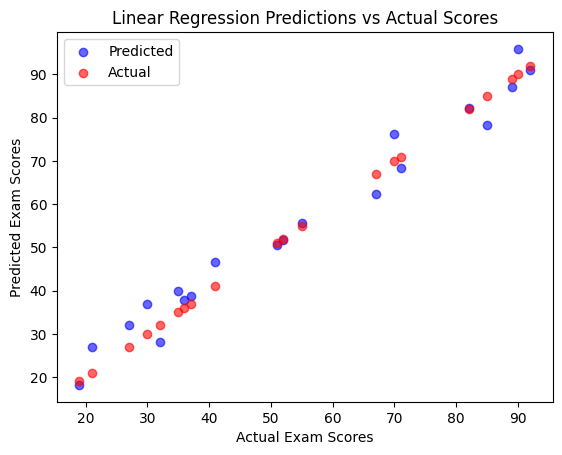

In [24]:
# Scatter plot for actual vs predicted scores
plt.scatter(y_test, y_pred, alpha=0.6, color  = 'blue', label = "Predicted")
plt.scatter(y_test, y_test, alpha=0.6, color = 'red', label = "Actual")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression Predictions vs Actual Scores")
plt.legend()
plt.show()

In [25]:
import pickle
# Save the Linear Regression model
with open("Artifacts/linear_regression_model.pkl", "wb") as file:
    pickle.dump(linear_model, file)